In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Math and vectors
import pandas as pd
import numpy as np

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#ML and FE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, PowerTransformer, StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.10.1


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

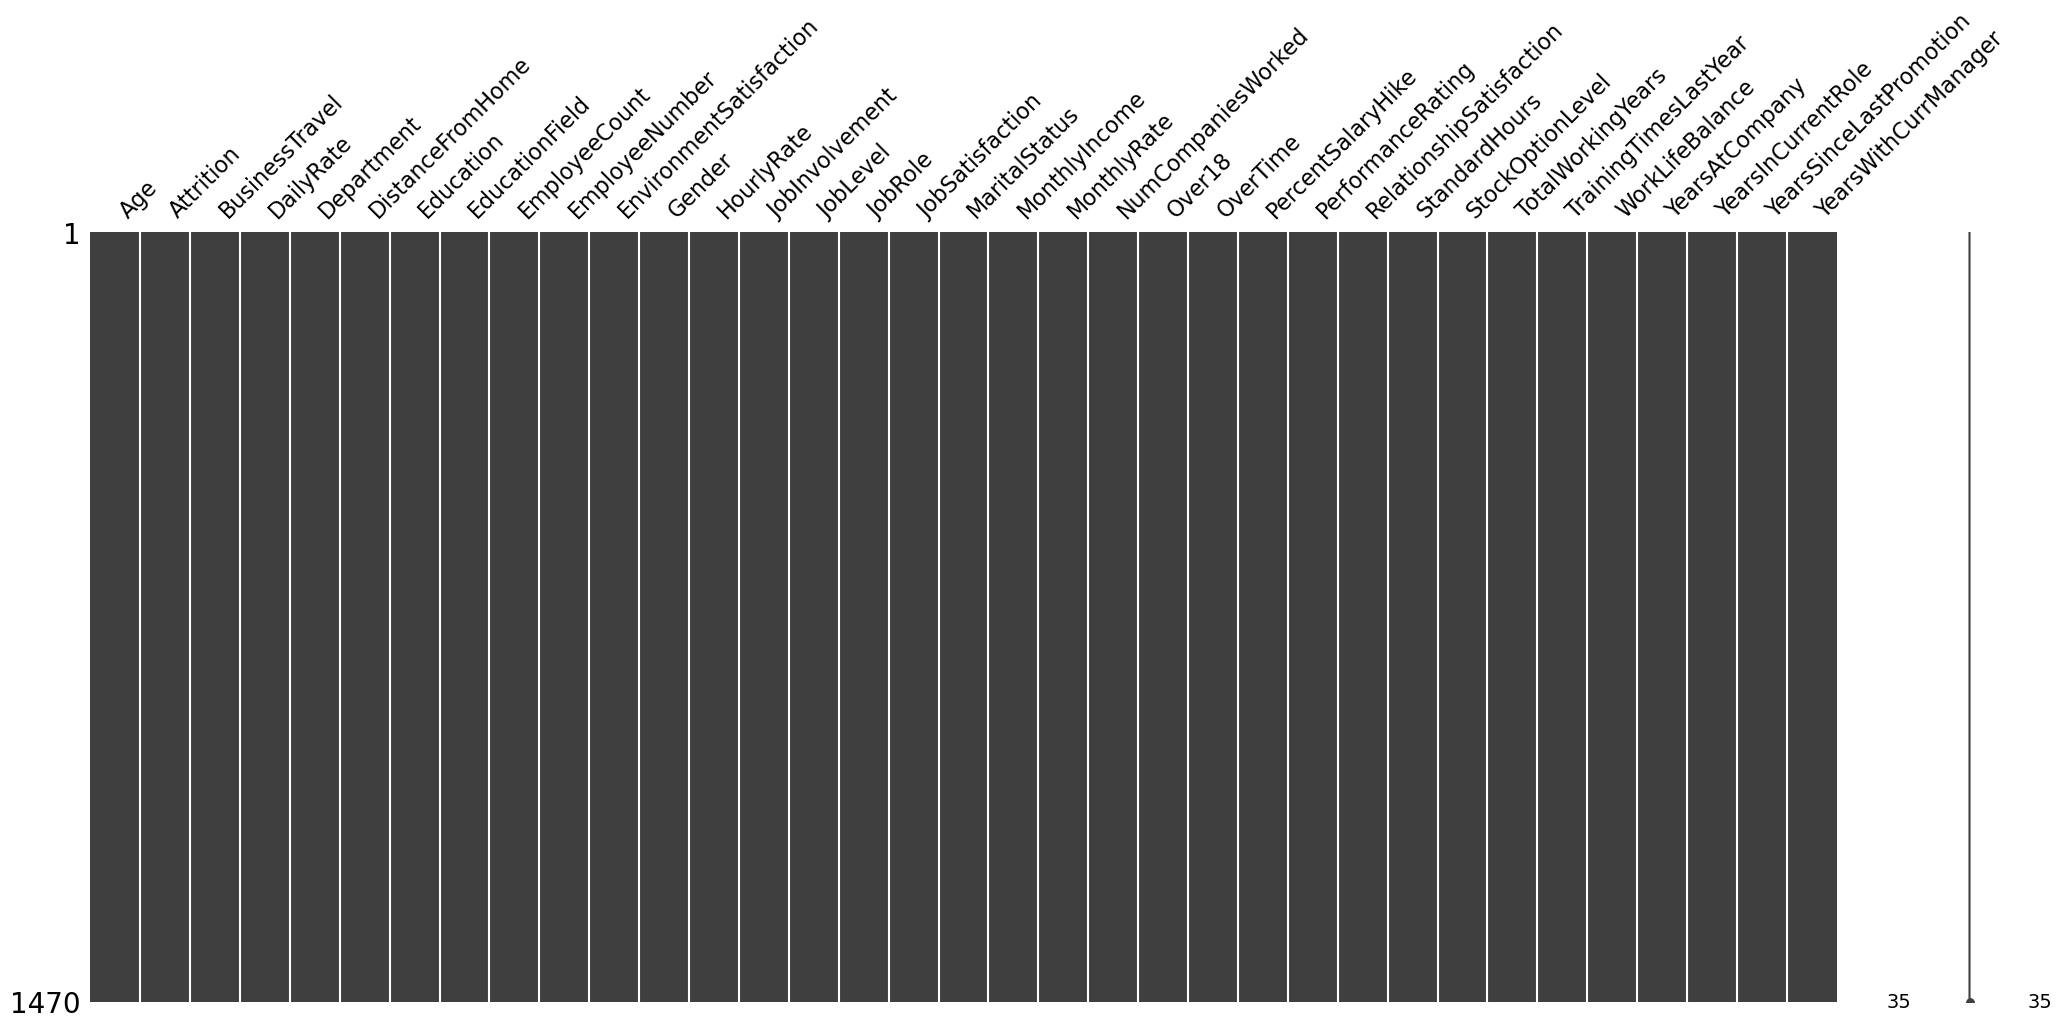

In [10]:
msno.matrix(df)

In [11]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [12]:
num_features = list(df.select_dtypes(include = ["float64", "int64"]).columns)
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### Data Preprocessing

In [13]:
features_to_transe = list(('WorkLifeBalance', 'StockOptionLevel' ,'RelationshipSatisfaction' ,'PerformanceRating' ,'JobSatisfaction' ,'JobInvolvement','EnvironmentSatisfaction','Education','JobLevel'))
df[features_to_transe] = df[features_to_transe].astype("category")

In [14]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Mappings

In [15]:
# Create a dictionary for mapping the values in each column
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
environment_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involvement_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_rating_map = { 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
Job_Level_map={1: 'Entry', 2: 'Junior', 3: 'Mid-Level', 4: 'Senior', 5: 'Executive'}
stock_option_map = {0: 'No stock options granted', 
                    1: 'Stock options granted at a discount', 
                    2: 'Stock options granted at market price', 
                    3: 'Stock options granted at a premium price'}

In [16]:
df['Education'] = df['Education'].map(education_map)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(environment_satisfaction_map)
df['JobInvolvement'] = df['JobInvolvement'].map(job_involvement_map)
df['JobSatisfaction'] = df['JobSatisfaction'].map(job_satisfaction_map)
df['PerformanceRating'] = df['PerformanceRating'].map(performance_rating_map)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map(relationship_satisfaction_map)
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(work_life_balance_map)
df['JobLevel'] = df['JobLevel'].map(Job_Level_map)
df['StockOptionLevel'] = df['StockOptionLevel'].map(stock_option_map)

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,No stock options granted,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,Stock options granted at a discount,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,No stock options granted,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,No stock options granted,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,Stock options granted at a discount,6,3,Better,2,2,2,2


In [18]:
num_features = list(df.select_dtypes(include = ["float64", "int64"]).columns)
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
cat_features = list((df.select_dtypes(exclude = ["float64", "int64"]).columns))
cat_features

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [20]:
features_to_transe

['WorkLifeBalance',
 'StockOptionLevel',
 'RelationshipSatisfaction',
 'PerformanceRating',
 'JobSatisfaction',
 'JobInvolvement',
 'EnvironmentSatisfaction',
 'Education',
 'JobLevel']

#### Showing the unique values for each categorical features

In [21]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [22]:
for cat in cat_features:
    unique_values = df[cat].unique()
    print(f"The unique values in '{cat}' variables are: ")
    print(" ")
    for val in unique_values:
        print(val)
    print("\n")

The unique values in 'Attrition' variables are: 
 
Yes
No


The unique values in 'BusinessTravel' variables are: 
 
Travel_Rarely
Travel_Frequently
Non-Travel


The unique values in 'Department' variables are: 
 
Sales
Research & Development
Human Resources


The unique values in 'Education' variables are: 
 
College
Below College
Master
Bachelor
Doctor


The unique values in 'EducationField' variables are: 
 
Life Sciences
Other
Medical
Marketing
Technical Degree
Human Resources


The unique values in 'EnvironmentSatisfaction' variables are: 
 
Medium
High
Very High
Low


The unique values in 'Gender' variables are: 
 
Female
Male


The unique values in 'JobInvolvement' variables are: 
 
High
Medium
Very High
Low


The unique values in 'JobLevel' variables are: 
 
Junior
Entry
Mid-Level
Senior
Executive


The unique values in 'JobRole' variables are: 
 
Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representativ

## Visualization

In [23]:
fig = px.histogram(df, x = "Age", title = "Age Countplot")
fig.update_layout(xaxis_title = "Age", yaxis_title = "Count")
fig.update_traces(marker = dict(color = "green"))

fig.show(renderer = "kaggle")

### Distributing the Categorical Features

In [24]:
# Assuming `dataset` is your DataFrame containing the data
# Count the values in the 'JobSatisfaction' column

satisfaction_counts = df['JobSatisfaction'].value_counts()
# Count the values in the 'MaritalStatus' column
marital_status_counts = df['MaritalStatus'].value_counts()
# Count the values in the 'JobLevel' column
job_level_counts = df['JobLevel'].value_counts()
PerformanceRating_counts=df['PerformanceRating'].value_counts()
# Count the values in the 'Gender' column
gender_counts = df['Gender'].value_counts()
RelationshipSatisfaction_counts=df['RelationshipSatisfaction'].value_counts()
WorkLifeBalance_counts=df['WorkLifeBalance'].value_counts()
OverTime_counts=df['OverTime'].value_counts()
JobRole_counts=df['JobRole'].value_counts()
Department_counts=df['Department'].value_counts()
EducationField_counts=df['EducationField'].value_counts()
BusinessTravel_counts=df['BusinessTravel'].value_counts()

# Create a list of chart types to be used for each subplot
                #0     #1     #2     #3     #4     #5      #6    #7      #8     #9     #10   #11
chart_types = ['Bar', 'Pie', 'Pie', 'Pie', 'Bar', 'Pie', 'Pie', 'Bar', 'Pie', 'Pie', 'Pie', 'Bar']

fig = make_subplots(rows=4, cols=3, subplot_titles=('<b>Proportion Of Gender<b>', '<b>Proportion Of Job Satisfaction<b>',
                                                    '<b>Proportion Of marital status<b>', '<b>Proportion Of job level<b>',
                                                    '<b>PerformanceRating<b>','<b>Relationship Satisfaction<b>',
                                                   '<b>WorkLifeBalance<b>','<b>OverTime<b>',
                                                   '<b>JobRole<b>','<b>Department<b>',
                                                   '<b>EducationField<b>','<b> Business Travel <b>'),
                    specs=[[{'type': chart_types[0]}, {'type': chart_types[1]}, {'type': chart_types[2]}],
                           [{'type': chart_types[3]}, {'type': chart_types[4]}, {'type': chart_types[5]}],
                           [{'type': chart_types[6]}, {'type': chart_types[7]}, {'type': chart_types[8]}],
                           [{'type': chart_types[9]}, {'type': chart_types[10]}, {'type': chart_types[11]}]
                          ])

fig.add_trace(       #0
    go.Bar(
        x=gender_counts.index,
        y=gender_counts.values,
        text=df["Gender"]
        
    ), row=1, col=1
)
                                #1
fig.add_trace(
    go.Pie(
        labels=satisfaction_counts.index,
        values=satisfaction_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'brown', 'purple'],
        pull=[0, 0.08, 0.03, 0.001]
        
    ), row=1, col=2
)
                                       #2
fig.add_trace(
    go.Pie(
        labels=marital_status_counts.index,
        values=marital_status_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=1, col=3
)
                                 #3
fig.add_trace( 
    go.Pie(
        labels=job_level_counts.index,
        values=job_level_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red', 'black'],
        pull=[0, 0.08, 0.03, 0.001]
        
    ), row=2, col=1
)


                                                #4
fig.add_trace(
    go.Bar(
         x=PerformanceRating_counts.index,
         y=PerformanceRating_counts.values,
         text=df['PerformanceRating']
    ), row=2, col=2
)
                                                #5
fig.add_trace(
    go.Pie(
        labels=RelationshipSatisfaction_counts.index,
        values=RelationshipSatisfaction_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=2, col=3
)
                                                #6
fig.add_trace(
    go.Pie(
        labels=WorkLifeBalance_counts.index,
        values=WorkLifeBalance_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=3, col=1
)
                                                #7
fig.add_trace(
    go.Bar(
        x=OverTime_counts.index,
        y=OverTime_counts.values,
        text=df['OverTime']
    ), row=3, col=2
)
                                                #8
fig.add_trace(
    go.Pie(
        labels=JobRole_counts.index,
        values=JobRole_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red','Lime','Coral','Violet','Yellow','JAM'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=3, col=3
)
                                                #9
fig.add_trace(
    go.Pie(
        labels=Department_counts.index,
        values=Department_counts.values,
        hole=0.1,
        marker_colors=['Lime','Violet','JAM'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=4, col=1
)
                                                    #10
fig.add_trace(
    go.Pie(
        labels=EducationField_counts.index,
        values=EducationField_counts.values,
        hole=0.1,
        marker_colors=['Lime','Violet','JAM','blue', 'red','green'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=4, col=2
)
                                                    #11
fig.add_trace(
    go.Bar(
        x=BusinessTravel_counts.index,
        y=BusinessTravel_counts.values,
        text=df['BusinessTravel']
        
    ), row=4, col=3
)
fig.update_layout(
    title='<b>Distributions<b>',
    showlegend=True,
    height=900,  # Adjust the height
    width=1250,   # Adjust the width
    margin=dict(l=10, r=10, t=50, b=10)  # Adjust the margin
)

fig.show()

## Attrition and Gender

In [25]:
fig = px.histogram(df, x = "Attrition", category_orders = dict(GeAttritionnder = ["Male", "Female"]), color = "Gender", title = "Attrition and Gender")
fig.show()

In [26]:
# Create the plot using plotly express
fig = px.strip(df, x='Age', y='JobSatisfaction', color='Attrition',
               title='Job Satisfaction by Age and Attrition')

# Add axis labels and customize the legend
fig.update_layout(xaxis_title='Age', yaxis_title='Job Satisfaction')
fig.update_traces(marker=dict(size=8))

# Display the plot
fig.show(renderer='kaggle')

<a id='Job_Satisfaction_by_Age_and_Job_Level'></a>
## Job Satisfaction by Age and Job Level

In [27]:
fig = px.strip(df, x = "Age", y = "JobSatisfaction", color = "JobLevel", title = "Job Satisfaction by Age and Job Level")
fig.update_layout(xaxis_title = "Age", yaxis_title = "Job Satisfication")
fig.update_traces(marker = dict(size = 8))

fig.show(renderer = "kaggle")

<a id='Job_Satisfaction_by_Attrition_and_Education_Field'></a>
## Job Satisfaction by Attrition and Education Field

In [28]:
fig = px.strip(df, x = "Attrition", y = "JobSatisfaction", color = "EducationField",
              title = "Job Satisfaction by Attrition and Education Field")
fig.update_layout(xaxis_title = "Attrition", yaxis_title = "Job Satisfaction")
fig.update_traces(marker = dict(size = 8))

fig.show(renderer = "kaggle")

<a id='Job_Satisfaction_by_Age_and_Job_Role'></a>

### Job Satisfaction by Age and Job Role

In [29]:
fig = px.strip(df, x = "Age", y = 'JobSatisfaction', color = "JobRole", title = "Job Satisfaction by Age and Job Role")
fig.update_layout(xaxis_title = "Age", yaxis_title = "Job Satisfaction")
fig.update_traces(marker = dict(size = 8))
fig.show(renderer = "kaggle")

<a id='Job_Satisfaction_by_Age_and_Business_Travel'></a>
### Job Satisfaction by Age and Business Travel

In [30]:
# Create the plot using plotly express
fig = px.scatter(df, x='Age', y='JobSatisfaction', color='BusinessTravel',
                 title='Job Satisfaction by Age and Business Travel', hover_data=['JobRole'])

# Add axis labels and customize the legend
fig.update_layout(xaxis_title='Age', yaxis_title='Job Satisfaction')
fig.update_traces(marker=dict(size=8))
fig.update_traces(marker=dict(size=10))

# Display the plot using the Kaggle renderer
fig.show(renderer='kaggle')

<a id='Performance_Rating_by_Age_and_Gender'></a>
### Performance Rating by Age and Gender

Text(0.5, 1.0, 'Performance Rating by Age and Gender')

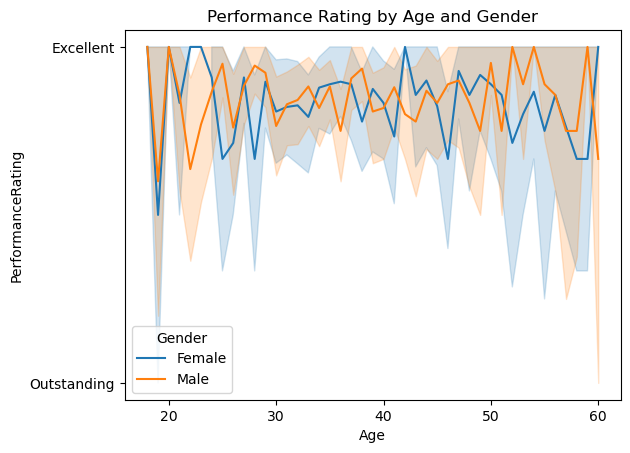

In [31]:
sns.lineplot(x = "Age", y = "PerformanceRating", hue = "Gender", data = df)
plt.title("Performance Rating by Age and Gender")

In [32]:
df = df.drop(["StandardHours", "EmployeeCount"], axis = 1)

In [33]:
num_features.remove("EmployeeCount")
num_features.remove("StandardHours")

cat_features.remove("Over18")

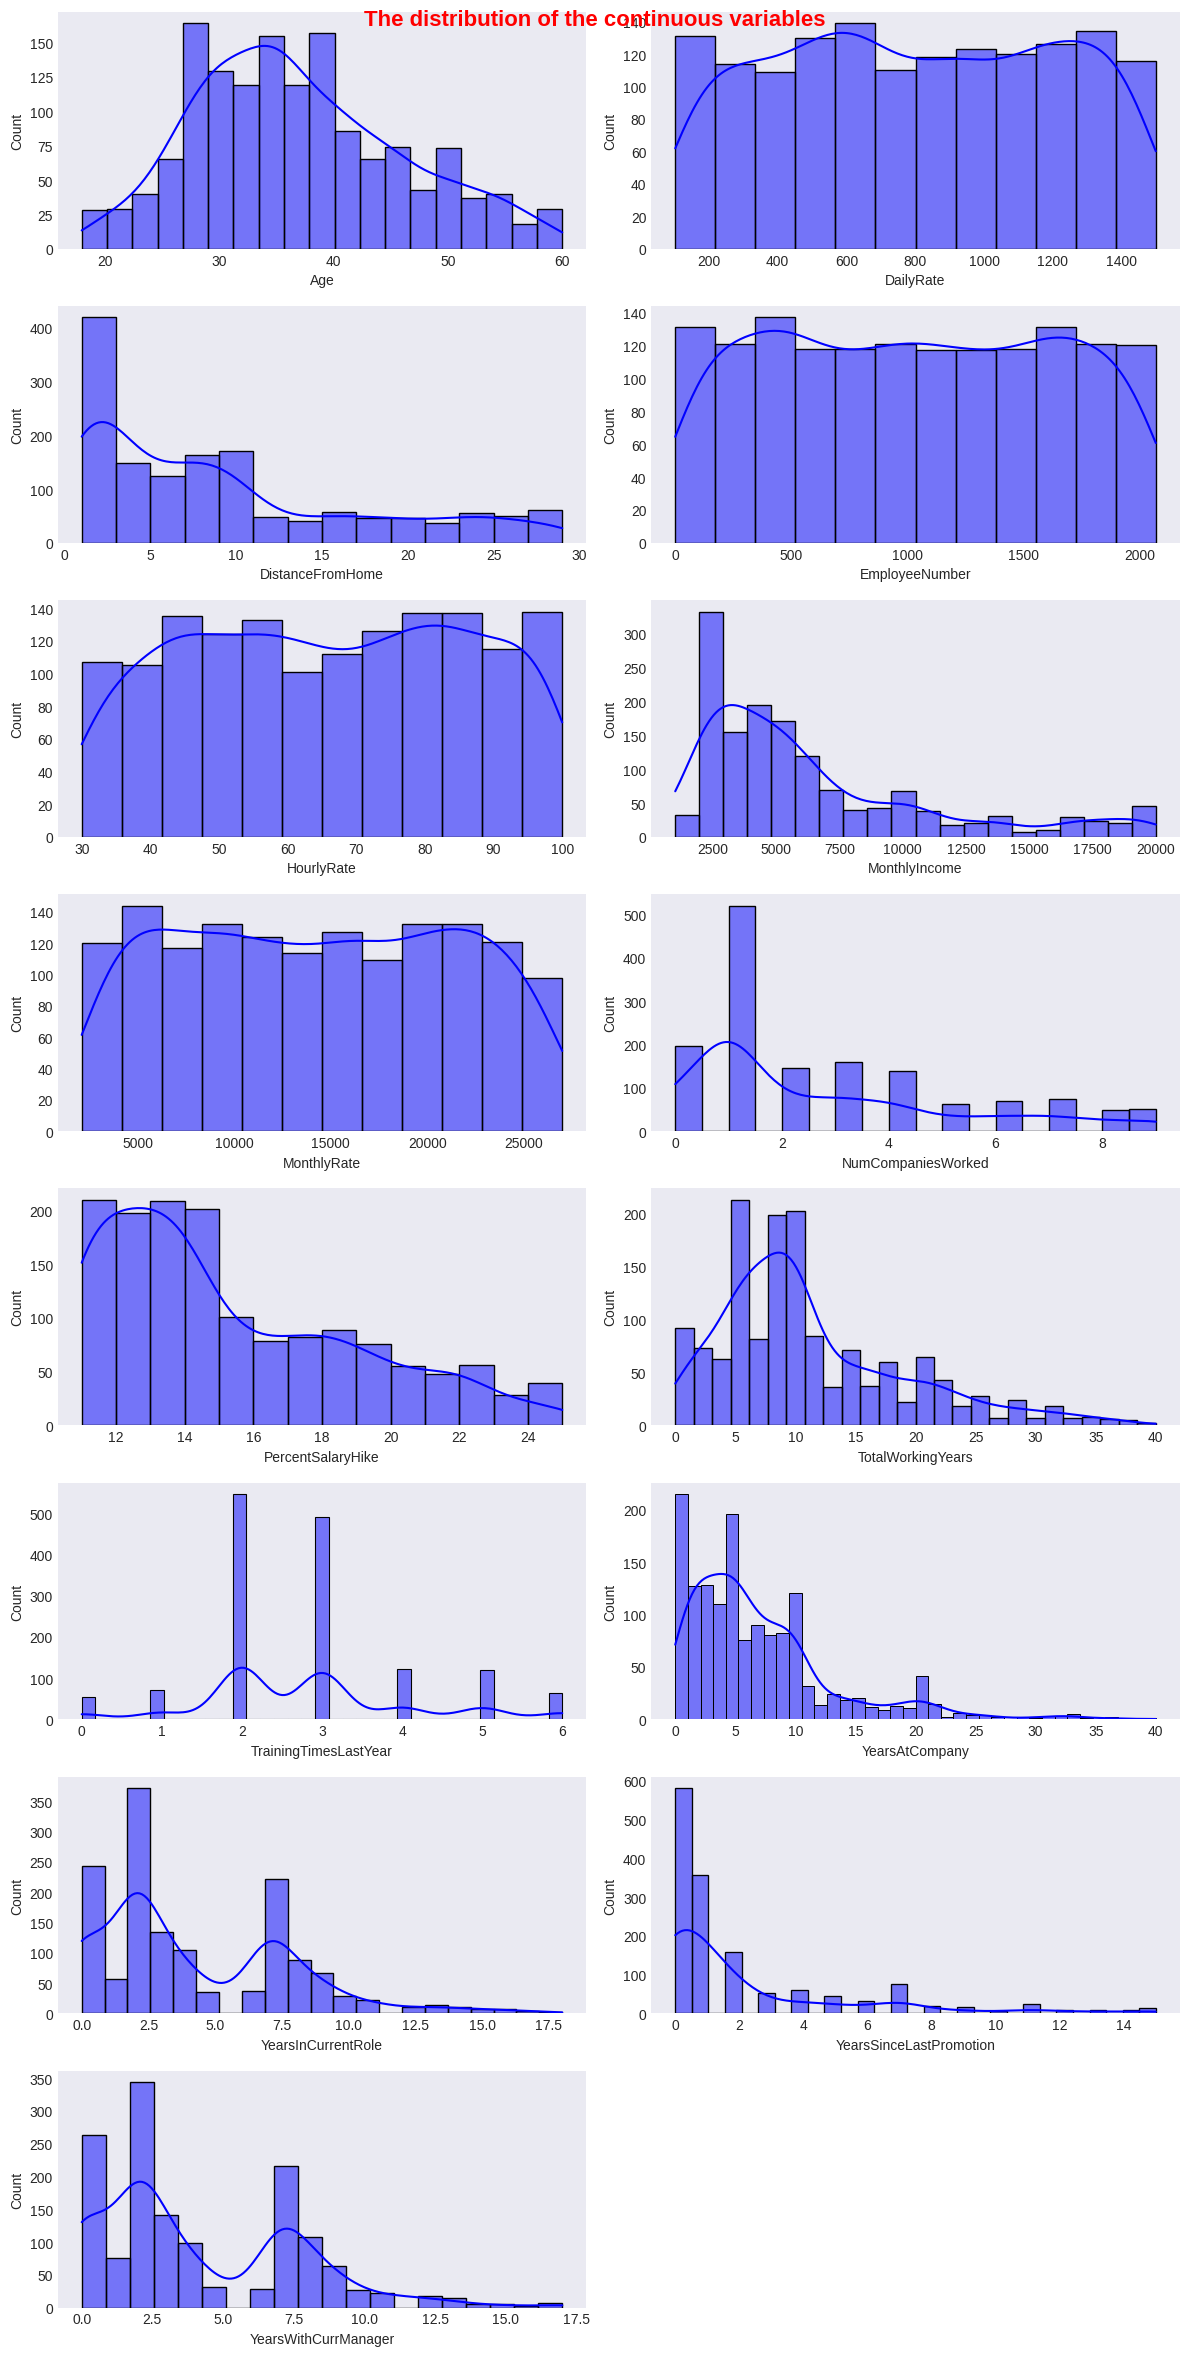

In [34]:
plt.style.use("seaborn-dark")

num_features = df.select_dtypes(include = ["float64", "int64"]).columns
num_cols = len(num_features)
num_rows = (num_cols + 1) // 2

plt.figure(figsize = (12, 3 * num_rows))

for i, col in enumerate(num_features):
    ax = plt.subplot(num_rows, 2, i + 1)
    sns.histplot(data = df, x = col, ax = ax, color = "blue", kde = True)
    
plt.suptitle("The distribution of the continuous variables", fontsize = 16, fontweight = "bold", color = "Red")
plt.tight_layout()
plt.show()

## Correlation Matrix

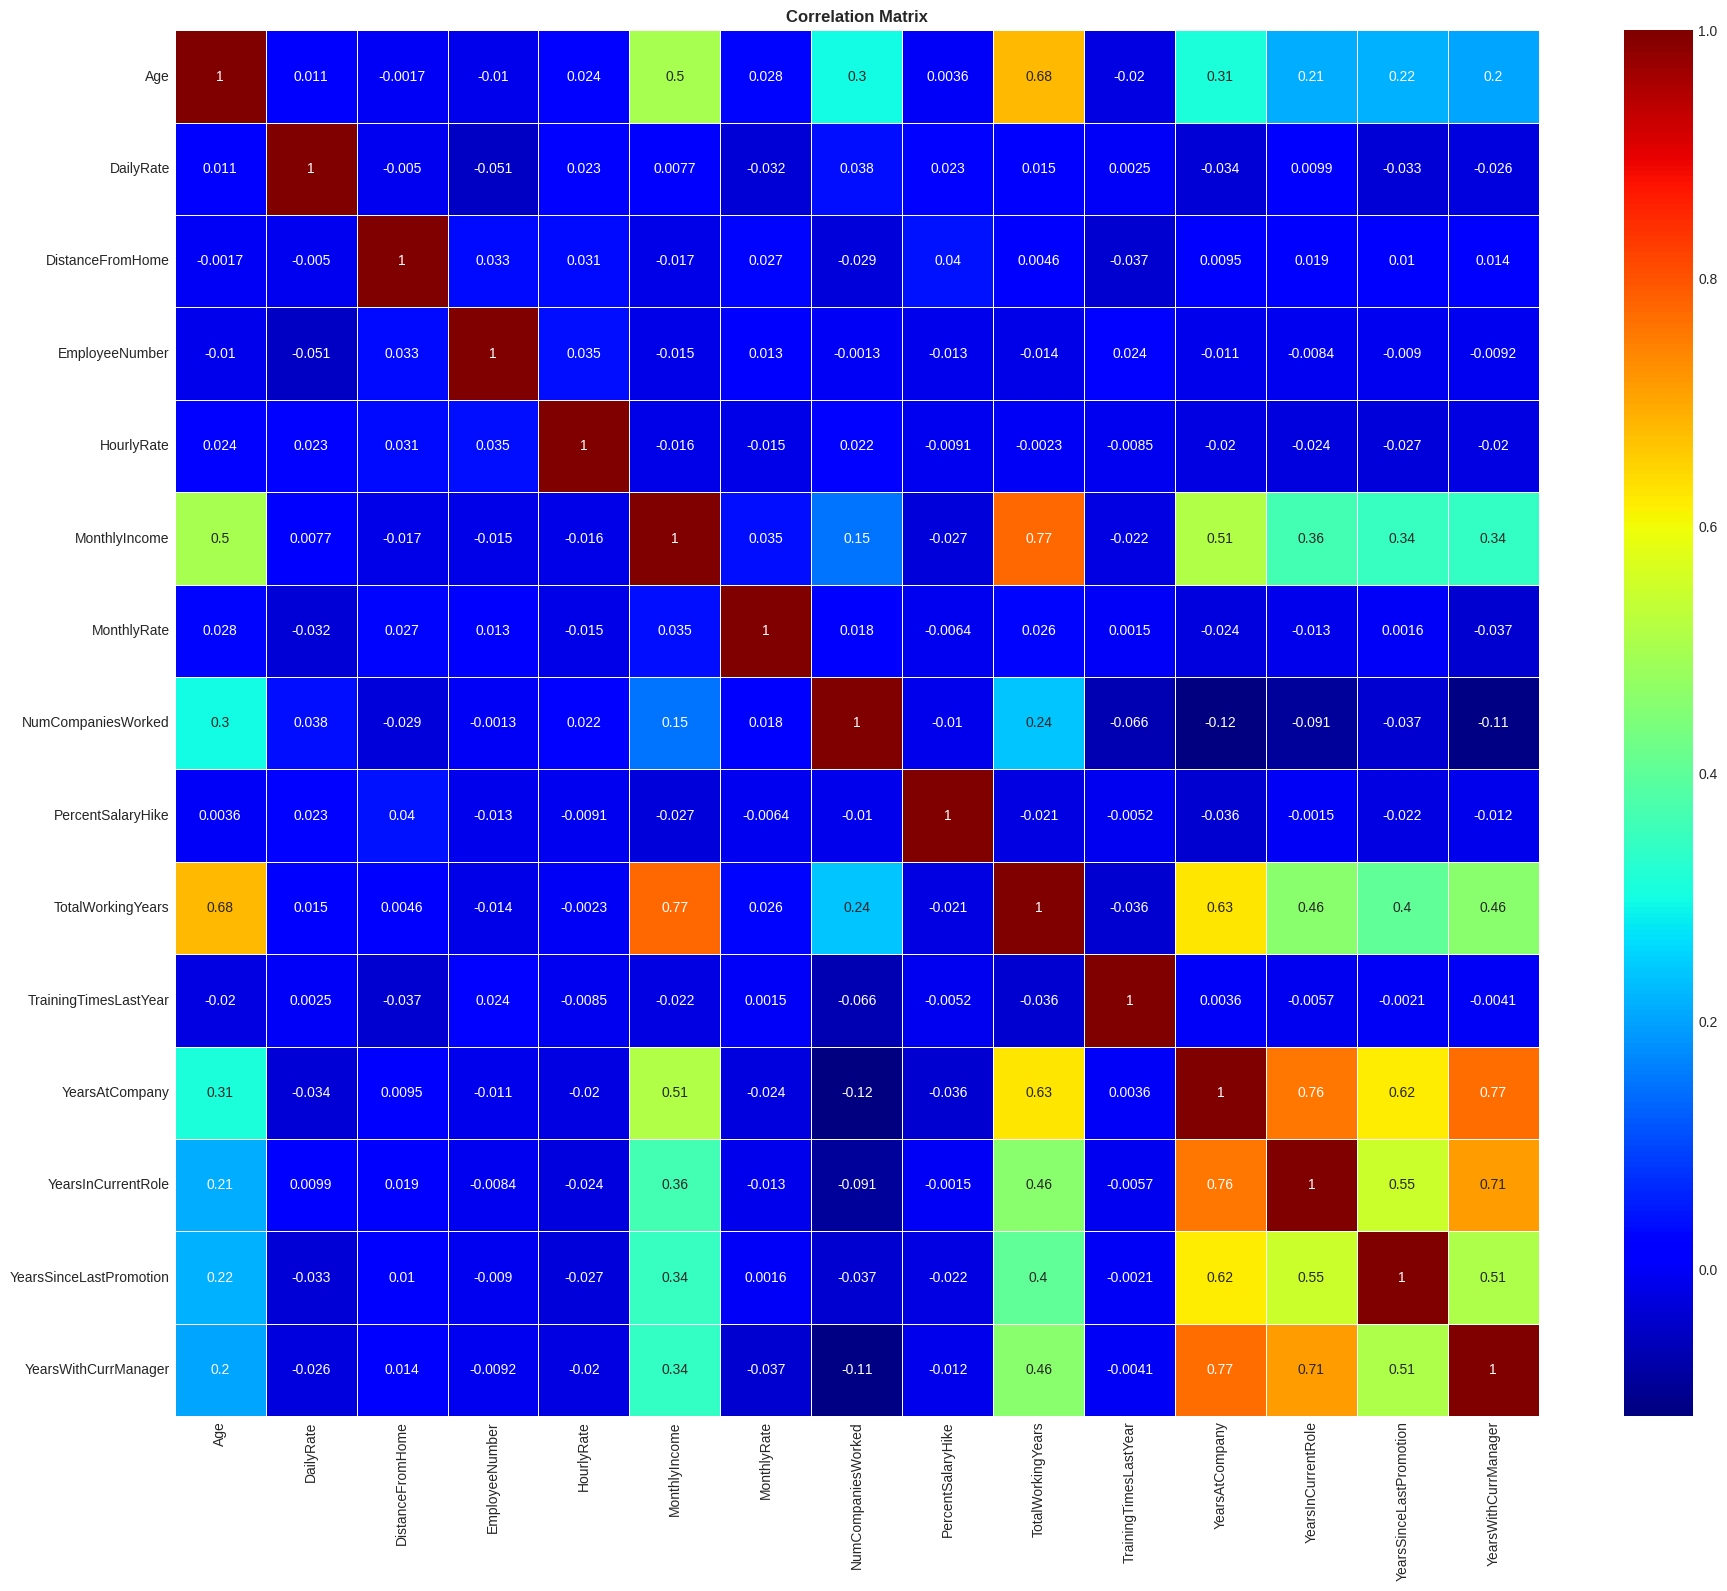

In [35]:
plt.figure(figsize = (22, 18))
sns.heatmap(df.corr(), annot = True, cmap = "jet", linewidths = 0.5, annot_kws = {"size": 10})
plt.title("Correlation Matrix", fontsize = 12, fontweight = "bold")
plt.show()

In [36]:
y = df["Attrition"]

In [37]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [38]:
X_select_num = df[num_features]
X_select_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [39]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func = f_classif, k = "all")
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_select_num, y, test_size = 0.33, random_state = 1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [41]:
feature_importance_df = pd.DataFrame({
    "Feature": X_select_num.columns,
    "Score": fs.scores_
})

feature_importance_df["Number"] = range(len(feature_importance_df))
feature_importance_df.set_index("Number", inplace = True)

print(feature_importance_df)

                        Feature      Score
Number                                    
0                           Age  20.395175
1                     DailyRate   3.384441
2              DistanceFromHome   8.553061
3                EmployeeNumber   0.541336
4                    HourlyRate   0.018822
5                 MonthlyIncome  21.070741
6                   MonthlyRate   0.155347
7            NumCompaniesWorked   0.488807
8             PercentSalaryHike   0.264651
9             TotalWorkingYears  24.058873
10        TrainingTimesLastYear   4.395220
11               YearsAtCompany  15.462023
12           YearsInCurrentRole  23.604649
13      YearsSinceLastPromotion   0.216724
14         YearsWithCurrManager  23.782316


In [42]:
trace = go.Bar(x = X_select_num.columns, y = fs.scores_)
layout = go.Layout(title = "Feature Importance Scores of the numerical features", xaxis = dict(tickangle = -45))
fig = go.Figure(data = [trace], layout = layout)
fig.update_layout(width = 800, height = 500)
fig.show()

In [43]:
X_encoded = df[cat_features].drop("Attrition", axis = 1)
X_encoded

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Junior,Sales Executive,Very High,Single,Yes,Excellent,Low,No stock options granted,Bad
1,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Junior,Research Scientist,Medium,Married,No,Outstanding,Very High,Stock options granted at a discount,Better
2,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Entry,Laboratory Technician,High,Single,Yes,Excellent,Medium,No stock options granted,Better
3,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Entry,Research Scientist,High,Married,Yes,Excellent,High,No stock options granted,Better
4,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Entry,Laboratory Technician,Medium,Married,No,Excellent,Very High,Stock options granted at a discount,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,College,Medical,High,Male,Very High,Junior,Laboratory Technician,Very High,Married,No,Excellent,High,Stock options granted at a discount,Better
1466,Travel_Rarely,Research & Development,Below College,Medical,Very High,Male,Medium,Mid-Level,Healthcare Representative,Low,Married,No,Excellent,Low,Stock options granted at a discount,Better
1467,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Very High,Junior,Manufacturing Director,Medium,Married,Yes,Outstanding,Medium,Stock options granted at a discount,Better
1468,Travel_Frequently,Sales,Bachelor,Medical,Very High,Male,Medium,Junior,Sales Executive,Medium,Married,No,Excellent,Very High,No stock options granted,Good


In [44]:
oe = OrdinalEncoder()

cols_to_encode = [
    "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating",
    "RelationshipSatisfaction", "WorkLifeBalance", "JobLevel"
]
oe.fit(X_encoded[cols_to_encode])
X_encoded[cols_to_encode] = oe.transform(X_encoded[cols_to_encode])
X_encoded

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Travel_Rarely,Sales,2.0,Life Sciences,2.0,Female,0.0,2.0,Sales Executive,3.0,Single,Yes,0.0,1.0,No stock options granted,0.0
1,Travel_Frequently,Research & Development,1.0,Life Sciences,0.0,Male,2.0,2.0,Research Scientist,2.0,Married,No,1.0,3.0,Stock options granted at a discount,2.0
2,Travel_Rarely,Research & Development,2.0,Other,3.0,Male,2.0,0.0,Laboratory Technician,0.0,Single,Yes,0.0,2.0,No stock options granted,2.0
3,Travel_Frequently,Research & Development,4.0,Life Sciences,3.0,Female,0.0,0.0,Research Scientist,0.0,Married,Yes,0.0,0.0,No stock options granted,2.0
4,Travel_Rarely,Research & Development,1.0,Medical,1.0,Male,0.0,0.0,Laboratory Technician,2.0,Married,No,0.0,3.0,Stock options granted at a discount,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,2.0,Medical,0.0,Male,3.0,2.0,Laboratory Technician,3.0,Married,No,0.0,0.0,Stock options granted at a discount,2.0
1466,Travel_Rarely,Research & Development,1.0,Medical,3.0,Male,2.0,3.0,Healthcare Representative,1.0,Married,No,0.0,1.0,Stock options granted at a discount,2.0
1467,Travel_Rarely,Research & Development,0.0,Life Sciences,2.0,Male,3.0,2.0,Manufacturing Director,2.0,Married,Yes,1.0,2.0,Stock options granted at a discount,2.0
1468,Travel_Frequently,Sales,0.0,Medical,3.0,Male,2.0,2.0,Sales Executive,2.0,Married,No,0.0,3.0,No stock options granted,3.0


In [45]:
cols_to_encode = [
    "StockOptionLevel", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"
]
encoded_cols = pd.get_dummies(X_encoded[cols_to_encode])
X_encoded = pd.concat([X_encoded, encoded_cols], axis = 1)

X_encoded.drop(cols_to_encode, axis = 1, inplace = True)
X_encoded

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,StockOptionLevel_No stock options granted,StockOptionLevel_Stock options granted at a discount,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2.0,2.0,0.0,2.0,3.0,0.0,1.0,0.0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,1.0,0.0,2.0,2.0,2.0,1.0,3.0,2.0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,2.0,3.0,2.0,0.0,0.0,0.0,2.0,2.0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,1.0,1.0,0.0,0.0,2.0,0.0,3.0,2.0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2.0,0.0,3.0,2.0,3.0,0.0,0.0,2.0,0,1,...,0,0,0,0,0,0,1,0,1,0
1466,1.0,3.0,2.0,3.0,1.0,0.0,1.0,2.0,0,1,...,0,0,0,0,0,0,1,0,1,0
1467,0.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,0,1,...,1,0,0,0,0,0,1,0,0,1
1468,0.0,3.0,2.0,2.0,2.0,0.0,3.0,3.0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [46]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_encoded, y)
# i'll make a copy of encoded_X to use this copy for ploting 
X_encoded_copy=X_encoded.copy()
X_encoded = fs.transform(X_encoded)

### Encoding feature importances as a dataframe and a graph

In [47]:

# create the feature importance dataframe
feature_importance_df = pd.DataFrame({'Feature': X_encoded_copy.columns, 'Score': fs.scores_})

# add a column for the index starting from 0
feature_importance_df['Number'] = range(len(feature_importance_df))

# set the index to the new column and drop the old index column
feature_importance_df.set_index('Number', inplace=True)

# print the resulting dataframe
print(feature_importance_df)

                                                  Feature      Score
Number                                                              
0                                               Education   3.108840
1                                 EnvironmentSatisfaction   0.867333
2                                          JobInvolvement   0.149139
3                                                JobLevel  58.268745
4                                         JobSatisfaction   6.692900
5                                       PerformanceRating   0.010381
6                                RelationshipSatisfaction   0.500955
7                                         WorkLifeBalance   1.433406
8               StockOptionLevel_No stock options granted  32.015095
9       StockOptionLevel_Stock options granted at a di...  19.940896
10      StockOptionLevel_Stock options granted at mark...   8.496206
11      StockOptionLevel_Stock options granted at a pr...   0.146103
12                              Bu

In [48]:
import plotly.graph_objs as go

# create trace
trace = go.Bar(x=list(X_encoded_copy.columns), y=fs.scores_)

# create layout
layout = go.Layout(title='Feature Importance Scores of the categorical features', xaxis=dict(tickangle=-45))

# create figure
fig = go.Figure(data=[trace], layout=layout)

# update figure size
fig.update_layout(width=1200, height=900)

# show figure
fig.show()

In [49]:
X = pd.concat([X_encoded_copy, X_select_num], axis = 1)

In [50]:
X

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,StockOptionLevel_No stock options granted,StockOptionLevel_Stock options granted at a discount,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.0,2.0,0.0,2.0,3.0,0.0,1.0,0.0,1,0,...,5993,19479,8,11,8,0,6,4,0,5
1,1.0,0.0,2.0,2.0,2.0,1.0,3.0,2.0,0,1,...,5130,24907,1,23,10,3,10,7,1,7
2,2.0,3.0,2.0,0.0,0.0,0.0,2.0,2.0,1,0,...,2090,2396,6,15,7,3,0,0,0,0
3,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,...,2909,23159,1,11,8,3,8,7,3,0
4,1.0,1.0,0.0,0.0,2.0,0.0,3.0,2.0,0,1,...,3468,16632,9,12,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2.0,0.0,3.0,2.0,3.0,0.0,0.0,2.0,0,1,...,2571,12290,4,17,17,3,5,2,0,3
1466,1.0,3.0,2.0,3.0,1.0,0.0,1.0,2.0,0,1,...,9991,21457,4,15,9,5,7,7,1,7
1467,0.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,0,1,...,6142,5174,1,20,6,0,6,2,0,3
1468,0.0,3.0,2.0,2.0,2.0,0.0,3.0,3.0,1,0,...,5390,13243,2,14,17,3,9,6,0,8


In [51]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [52]:
calc_vif(X.select_dtypes(include = ["float", "int"]))

,variables,VIF
0,Education,2.121888
1,EnvironmentSatisfaction,2.483734
2,JobInvolvement,1.615441
3,JobLevel,4.285322
4,JobSatisfaction,2.524888
5,PerformanceRating,2.430418
6,RelationshipSatisfaction,2.532279
7,WorkLifeBalance,7.854845
8,Age,29.738213
9,DailyRate,4.877876


In [53]:
X=X.drop(['PercentSalaryHike','YearsAtCompany','TotalWorkingYears','HourlyRate','WorkLifeBalance'],axis=1)

In [54]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [55]:
calc_vif(X.select_dtypes(include = ["float", "int"]))

,variables,VIF
0,Education,2.111468
1,EnvironmentSatisfaction,2.447595
2,JobInvolvement,1.580808
3,JobLevel,4.208174
4,JobSatisfaction,2.445467
5,PerformanceRating,1.184823
6,RelationshipSatisfaction,2.462355
7,Age,17.783675
8,DailyRate,4.487122
9,DistanceFromHome,2.254864


In [56]:
print(pd.Series(y).value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


In [57]:
fig = px.pie(y, names = "Attrition")
fig.update_layout(title = "<b>Attrition Proportion before SMOTE Upsampling<b>")
fig.show()

In [58]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(pd.Series(y).value_counts())

Yes    1233
No     1233
Name: Attrition, dtype: int64


In [59]:
fig = px.pie(y, names = "Attrition")
fig.update_layout(title = "<b>Attrition Proportion after SMOTE upsampling<b>")
fig.show()

In [60]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 1, ..., 1, 1, 1])

## Splitting the Variables

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [62]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1726, 50) (740, 50) (1726,) (740,)


In [63]:
power_transformer = PowerTransformer(method = "yeo-johnson")
X_train = power_transformer.fit_transform(X_train)
X_test = power_transformer.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Machine Learning Modeling

In [64]:
accuracies_dict = {}
accuracies_dataframe = pd.DataFrame(accuracies_dict)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report ,roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## KNN

In [66]:

# Define a range of k values
k_values = np.arange(1, 21)

# Initialize lists to store accuracies for different k values
accuracies = []

# Iterate over different k valuesة
for k in k_values:
    # Create a KNN classifier with the current k value
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create a trace for the accuracy values
trace = go.Scatter(
    x=k_values,
    y=accuracies,
    mode='lines+markers',
    name='Accuracy',
    line=dict(color='blue'),
    marker=dict(symbol='circle', size=8)
)

# Create the layout for the plot
layout = go.Layout(
    title='Accuracy for Different Number of Neighbors (k)',
    xaxis=dict(title='Number of Neighbors (k)'),
    yaxis=dict(title='Accuracy'),
    hovermode='closest',
    showlegend=False
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Show the interactive plot
fig.show()

In [67]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [68]:
KNN_y_pred = KNN_classifier.predict(X_test)

KNN_cm = confusion_matrix(y_test, KNN_y_pred)
print("Confusion Matrix: ")
print(KNN_cm)

Confusion Matrix: 
[[360  16]
 [ 23 341]]


In [69]:
KNN_accuracy = accuracy_score(y_test, KNN_y_pred)
print("Accuracy: {:.2f}%".format(KNN_accuracy * 100))

Accuracy: 94.73%


In [70]:
KNN_report = classification_report(y_test, KNN_y_pred)
print("Classification Report: ")
print(KNN_report)

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       376
           1       0.96      0.94      0.95       364

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740



In [71]:
KNN_CROSS_VAL = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 10, scoring = "accuracy", n_jobs = -1)
print("(Accuracy): {:.2f}%".format(KNN_CROSS_VAL.mean() * 100))
accuracies_dataframe["KNeighborsClassifier"] = {"accuracy": KNN_CROSS_VAL.mean() * 100}

(Accuracy): 93.33%


## Kernel SVM Model

In [72]:
Kernel_SVM_classifier = SVC(kernel = "rbf", random_state = 42)
Kernel_SVM_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [73]:
Kernel_SVM_y_pred = Kernel_SVM_classifier.predict(X_test)

Kernel_SVM_cm = confusion_matrix(y_test, Kernel_SVM_y_pred)
print("Confusion Matrix:")
print(Kernel_SVM_cm)

Confusion Matrix:
[[371   5]
 [ 50 314]]


In [74]:
# Compute the accuracy score
Kernel_SVM_accuracy = accuracy_score(y_test, Kernel_SVM_y_pred)
print("Accuracy: {:.2f}%".format(Kernel_SVM_accuracy * 100))

Accuracy: 92.57%


In [75]:
# Compute the classification report
Kernel_SVM_report = classification_report(y_test, Kernel_SVM_y_pred)
print("Classification Report:")
print(Kernel_SVM_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       376
           1       0.98      0.86      0.92       364

    accuracy                           0.93       740
   macro avg       0.93      0.92      0.93       740
weighted avg       0.93      0.93      0.93       740



<a id='k_fold_cross_validation_of_the_Kernel_SVM_model'></a>
## k_fold cross validation of the Kernel SVM model 

In [76]:
# Perform cross-validation and compute F1-score
KernelSVM_CROSS_VAL =cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, scoring='accuracy', n_jobs=-1)
print("(Accuracy): {:.2f}%".format(KernelSVM_CROSS_VAL.mean() * 100))

accuracies_dataframe['Kernel SVM']={'accuracy':KernelSVM_CROSS_VAL.mean()*100}

(Accuracy): 90.21%


## Logistic Regression Model

In [77]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [78]:
accuracies_dict = {}
lr_pred = lr.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix: ")
print(lr_cm)

lr_accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy :{:.2f}%".format(lr_accuracy * 100))

lr_report = classification_report(y_test, lr_pred)
print("Classification_Report: ")
print(lr_report)

Confusion Matrix: 
[[364  12]
 [ 44 320]]
Accuracy :92.43%
Classification_Report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       376
           1       0.96      0.88      0.92       364

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.93      0.92      0.92       740



In [79]:
lr_cross_val = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10, scoring = "accuracy", n_jobs = -1)
print("(Accuracy): {:.2f}".format(lr_cross_val.mean() * 100))
accuracies_dataframe["LogisticRegression"] = {
    "accuracy": lr_cross_val.mean() * 100
}

(Accuracy): 91.77


## Naive Bayes Model

In [80]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [81]:

NB_CROSS_VAL = cross_val_score(estimator=nb, X=X_train, y=y_train, scoring='accuracy', cv=10, n_jobs=-1)

print("Accuracy: {:.2f}%".format(NB_CROSS_VAL.mean() * 100))
print("Standard Deviation: {:.2f}%".format(NB_CROSS_VAL.std() * 100))

accuracies_dataframe['Naive Bayes'] = {'accuracy': NB_CROSS_VAL.mean() * 100}

Accuracy: 80.76%
Standard Deviation: 2.56%


In [82]:
nb_pred = nb.predict(X_test)
nb_cm = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix: ")
print(nb_cm)

nb_accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy: {:.2f}%".format(nb_accuracy * 100))

nb_report = classification_report(y_test, nb_pred)
print("Classification Report: ")
print(nb_report)

Confusion Matrix: 
[[268 108]
 [ 33 331]]
Accuracy: 80.95%
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       376
           1       0.75      0.91      0.82       364

    accuracy                           0.81       740
   macro avg       0.82      0.81      0.81       740
weighted avg       0.82      0.81      0.81       740



## Support Vector Machine (SVM) Model

<a id='Training_the_Support_Vector_Machine_(SVM)_model_on_the_Training_set'></a>
## Training the linear SVM model on the Training set

In [83]:
linear_SVM_classifier = SVC(kernel = "linear", random_state = 40)
linear_SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=40)

In [84]:
linear_SVM_y_pred = linear_SVM_classifier.predict(X_test)

linear_SVM_cm = confusion_matrix(y_test, linear_SVM_y_pred)
print("Confusion Matrix: ")
print(linear_SVM_cm)

Confusion Matrix: 
[[371   5]
 [ 45 319]]


In [85]:
linear_SVM_accuracy = accuracy_score(y_test, linear_SVM_y_pred)
print("Accuracy: {:.2f}%".format(linear_SVM_accuracy * 100))

Accuracy: 93.24%


In [86]:
linear_SVM_report = classification_report(y_test, linear_SVM_y_pred)
print("Classification Report")
print(linear_SVM_report)

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       376
           1       0.98      0.88      0.93       364

    accuracy                           0.93       740
   macro avg       0.94      0.93      0.93       740
weighted avg       0.94      0.93      0.93       740



In [87]:
linearSVM_CROSS_VAL = cross_val_score(estimator = linear_SVM_classifier, X = X_train, y = y_train, scoring = "accuracy", cv = 10, n_jobs = -1)

print("Accuracy: {:.2f}%".format(linearSVM_CROSS_VAL.mean() * 100))
print("Standard Deviation: {:.2f}%".format(linearSVM_CROSS_VAL.std() * 100))
accuracies_dataframe["linear SVM"] = {
    "accuracy": linearSVM_CROSS_VAL.mean() * 100
}

Accuracy: 91.95%
Standard Deviation: 1.81%


## Decision Tree Classifier

In [88]:
DT_classifier = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 3)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [89]:
DT_y_pred = DT_classifier.predict(X_test)

DT_cm = confusion_matrix(y_test, DT_y_pred)
print("Confusion Matrix: ")
print(DT_cm)

Confusion Matrix: 
[[325  51]
 [ 55 309]]


In [90]:
DT_accuracy = accuracy_score(y_test, DT_y_pred)
print("Accuracy: {:.2f}%".format(DT_accuracy * 100))

DT_report = classification_report(y_test, DT_y_pred)
print("Classification Report: ")
print(DT_report)

Accuracy: 85.68%
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       376
           1       0.86      0.85      0.85       364

    accuracy                           0.86       740
   macro avg       0.86      0.86      0.86       740
weighted avg       0.86      0.86      0.86       740



In [91]:
DT_CROSS_VAL = cross_val_score(estimator = DT_classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Accuracy: {:.2f}%".format(DT_CROSS_VAL.mean() * 100))
print("Standard Deviation: {:.2f}%".format(DT_CROSS_VAL.std() * 100))
accuracies_dataframe["DecisionTreeClassifier"] = {
    "accuracy": DT_CROSS_VAL.mean() * 100
}

Accuracy: 83.83%
Standard Deviation: 2.96%


## Random Forest Classification Model

In [92]:
RF_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 7, n_jobs = -1)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_jobs=-1)

In [93]:
RF_y_pred = RF_classifier.predict(X_test)

RF_cm = confusion_matrix(y_test, RF_y_pred)
print("Confusion Matrix")
print(RF_cm)

Confusion Matrix
[[363  13]
 [ 45 319]]


In [94]:
RF_accuracy = accuracy_score(y_test, RF_y_pred)
print("Accuracy: {:.2f}%".format(RF_accuracy * 100))

RF_report = classification_report(y_test, RF_y_pred)
print("Classification Report: ")
print(RF_report)

Accuracy: 92.16%
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       376
           1       0.96      0.88      0.92       364

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



In [95]:
RF_CROSS_VAL = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Accuracy: {:.2f}%".format(RF_CROSS_VAL.mean() * 100))
print("Standard Deviation: {:.2f}%".format(RF_CROSS_VAL.std() * 100))

accuracies_dataframe["RandomForestClassifier"] = {
    "accuracy": RF_CROSS_VAL.mean() * 100
}

Accuracy: 91.95%
Standard Deviation: 1.79%


## XGBoost Model

In [96]:
XGBoost_classifier = XGBClassifier(n_estimators = 100, eta = 0.1, learning_rate = 0.01, max_depth = 7, n_jobs = -1)
evalset = [(X_train, y_train), (X_test, y_test)]
XGBoost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, predictor=None, ...)

In [97]:
XGBoost_y_pred = XGBoost_classifier.predict(X_test)

XGBoost_cm = confusion_matrix(y_test, XGBoost_y_pred)
print("Confusion Matrix: ")
print(XGBoost_cm)

XGBoost_accuracy = accuracy_score(y_test, XGBoost_y_pred)
print("Accuracy: {:.2f}%".format(XGBoost_accuracy.mean() * 100))

XGBoost_report = classification_report(y_test, XGBoost_y_pred)
print("Classification report: ")
print(XGBoost_report)

Confusion Matrix: 
[[353  23]
 [ 51 313]]
Accuracy: 90.00%
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       376
           1       0.93      0.86      0.89       364

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



In [98]:
XGB_CROSS_VAL = cross_val_score(estimator = XGBoost_classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

print("Accuracy: {:.2f}%".format(XGB_CROSS_VAL.mean() * 100))
print("Standard Deviation: {:.2f}%".format(XGB_CROSS_VAL.std() * 100))

accuracies_dataframe["XGBoost"] = {
    "accuracy": XGB_CROSS_VAL.mean() * 100
}

Accuracy: 89.34%
Standard Deviation: 2.56%


In [99]:

# Get the predicted probabilities for the positive class
y_pred_prob = XGBoost_classifier.predict_proba(X_test)[:, 1]

# Set the threshold to maximize accuracy
threshold = 0.8
y_pred = (y_pred_prob >= threshold).astype(int)

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Compute the accuracy using the thresholded predictions
accuracy = accuracy_score(y_test, y_pred)

# Create the ROC curve trace
roc_trace = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve (AUC = {:.2f})'.format(auc_score),
    line=dict(color='blue')
)

# Create the random guess line
random_guess_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random Guess',
    line=dict(color='black', dash='dash')
)

# Create the layout
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    showlegend=True
)

# Create the figure
fig = go.Figure(data=[roc_trace, random_guess_trace], layout=layout)

# Show the figure
fig.show()



In [100]:
print(accuracies_dataframe.T)

                         accuracy
KNeighborsClassifier    93.333445
Kernel SVM              90.206681
LogisticRegression      91.771744
Naive Bayes             80.763207
linear SVM              91.945154
DecisionTreeClassifier  83.833177
RandomForestClassifier  91.945490
XGBoost                 89.337277


In [101]:
fig = make_subplots(rows=8, cols=1,shared_xaxes=True,subplot_titles=('KNeighborsClassifier Cross Val Scores',
                                                                     'Kernel SVM',
                                                                     'Logistic Regression Cross Val Scores',
                                                                    'Naive Bayes Cross Val Scores',
                                                                     'linear SVM Cross Val Scores',
                                                                     'Decision Tree Cross Val Scores',
                                                                    'RandomForest Cross Val Scores  ',
                                                                     
                                                                    'XGBoost Cross Val Scores '))           

fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=KNN_CROSS_VAL,name='KNeighborsClassifier Cross Val Scores'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=KernelSVM_CROSS_VAL,name='Kernel SVM'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=lr_cross_val,name='Logistic Regression Cross Val Scores'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=NB_CROSS_VAL,name='Naive Bayes Cross Val Scores'),
    row=4, col=1
)

fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=linearSVM_CROSS_VAL,name='linear SVM Cross Val Scores'),
    row=5, col=1
)

fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=DT_CROSS_VAL,name='Decision Tree Cross Val Scores'),
    row=6, col=1
) 


fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=RF_CROSS_VAL,name='RandomForest Cross Val Scores'),
    row=7, col=1
) 
fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=XGB_CROSS_VAL,name='XGBoost Cross Val Scores'),
    row=8, col=1
)

fig.update_layout(height=1000, width=1500, title_text="Different Model 10 Fold Cross Validation")
fig.update_yaxes(title_text="accuracy Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

# Thank you!